In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"D:\Documents\Github\capstone-autoserved\Dataset\FINAL3.csv")

In [3]:
df.head()

,Primary Key,Created,Mileage In,Work Order,Model,Line Type,Service Category,Service Package,Description,Definition,...,Quantity,Total,Discount,Net Total,ContactID,ServiceItemID,InvoiceID,labels,Make,Year
0,1,12/28/2018 10:18,33320,49,civic,Material,"Oil, Lube & Preventive Maintenance Service",MINOR Preventive Maintenance Service (MEDIUM S...,OIL FILTER HONDA,Engine Oil Filter,...,1.0,696.43,0.0,696.43,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,preventive maintenance,honda,2012
1,2,12/28/2018 10:18,33320,49,civic,Material,"Oil, Lube & Preventive Maintenance Service",MINOR Preventive Maintenance Service (MEDIUM S...,ENGINE FLUSHING,NaN,...,1.0,142.86,0.0,142.86,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,preventive maintenance,honda,2012
2,3,12/28/2018 10:18,33320,49,civic,Material,"Oil, Lube & Preventive Maintenance Service",MINOR Preventive Maintenance Service (MEDIUM S...,BRAKE CLEANER 14oz,NaN,...,1.0,227.68,0.0,227.68,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,preventive maintenance,honda,2012
3,4,12/28/2018 10:18,33320,49,civic,Labor,"Oil, Lube & Preventive Maintenance Service",MINOR Preventive Maintenance Service (MEDIUM S...,Labor,NaN,...,3.0,1339.29,0.0,1339.29,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,preventive maintenance,honda,2012
4,5,12/28/2018 10:18,33320,49,civic,Material,"Oil, Lube & Preventive Maintenance Service",MINOR Preventive Maintenance Service (MEDIUM S...,REPSOL ELITE INJECTION 10W40 1L - GAS/DIESEL,Engine Oil,...,4.0,1178.56,0.0,1178.56,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,preventive maintenance,honda,2012


In [4]:
df.columns

Index(['Primary Key', 'Created', 'Mileage In', 'Work Order', 'Model',
       'Line Type', 'Service Category', 'Service Package', 'Description',
       'Definition', 'Price', 'Quantity', 'Total', 'Discount', 'Net Total',
       'ContactID', 'ServiceItemID', 'InvoiceID', 'labels', 'Make', 'Year'],
      dtype='object')

In [5]:
df_eda = df[['Mileage In', 'Work Order', 'Make', 'Model','Year','Service Category','labels','Net Total']]

In [6]:
df_eda['Work Order'] = df_eda['Work Order'].astype('str')

<ipython-input-6-659832a9f2b5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eda['Work Order'] = df_eda['Work Order'].astype('str')


In [7]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37548 entries, 0 to 37547
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Mileage In        37548 non-null  int64  
 1   Work Order        37548 non-null  object 
 2   Make              37548 non-null  object 
 3   Model             37548 non-null  object 
 4   Year              37548 non-null  int64  
 5   Service Category  37548 non-null  object 
 6   labels            37548 non-null  object 
 7   Net Total         37548 non-null  float64
dtypes: float64(1), int64(2), object(5)
memory usage: 2.3+ MB


In [8]:
df_eda['Unique Identifier'] = df['Work Order'].astype(str) + df['Make'] + df['Model'] + df['Year'].astype(str)

<ipython-input-8-298edd4a0bd8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eda['Unique Identifier'] = df['Work Order'].astype(str) + df['Make'] + df['Model'] + df['Year'].astype(str)


In [9]:
df_eda.head()

,Mileage In,Work Order,Make,Model,Year,Service Category,labels,Net Total,Unique Identifier
0,33320,49,honda,civic,2012,"Oil, Lube & Preventive Maintenance Service",preventive maintenance,696.43,49hondacivic2012
1,33320,49,honda,civic,2012,"Oil, Lube & Preventive Maintenance Service",preventive maintenance,142.86,49hondacivic2012
2,33320,49,honda,civic,2012,"Oil, Lube & Preventive Maintenance Service",preventive maintenance,227.68,49hondacivic2012
3,33320,49,honda,civic,2012,"Oil, Lube & Preventive Maintenance Service",preventive maintenance,1339.29,49hondacivic2012
4,33320,49,honda,civic,2012,"Oil, Lube & Preventive Maintenance Service",preventive maintenance,1178.56,49hondacivic2012


In [10]:
df_eda.groupby(['Make','Service Category']).size().reset_index()

,Make,Service Category,0
0,audi,"Accessories (Gauges, Power Accessories, Vision...",8
1,audi,Brakes,5
2,audi,"Drive Train (Final Drive, Transaxle, Different...",2
3,audi,"Driveability (Fuel, Ignition & Emission Systems)",21
4,audi,"Electrical (Belts, Lighting, Starting & Chargi...",2
...,...,...,...
240,volvo,Brakes,4
241,volvo,Engine,3
242,volvo,"HVAC (Heating, Ventilation & Air Conditioning)",2
243,volvo,"Oil, Lube & Preventive Maintenance Service",18


In [11]:
df_eda.loc[df_eda['Net Total'] > 0,:]

,Mileage In,Work Order,Make,Model,Year,Service Category,labels,Net Total,Unique Identifier
0,33320,49,honda,civic,2012,"Oil, Lube & Preventive Maintenance Service",preventive maintenance,696.43,49hondacivic2012
1,33320,49,honda,civic,2012,"Oil, Lube & Preventive Maintenance Service",preventive maintenance,142.86,49hondacivic2012
2,33320,49,honda,civic,2012,"Oil, Lube & Preventive Maintenance Service",preventive maintenance,227.68,49hondacivic2012
3,33320,49,honda,civic,2012,"Oil, Lube & Preventive Maintenance Service",preventive maintenance,1339.29,49hondacivic2012
4,33320,49,honda,civic,2012,"Oil, Lube & Preventive Maintenance Service",preventive maintenance,1178.56,49hondacivic2012
...,...,...,...,...,...,...,...,...,...
37543,145542,2141,toyota,rav4,2004,"HVAC (Heating, Ventilation & Air Conditioning)",Air Conditioner General Cleaning Service,949.10,2141toyotarav42004
37544,145542,2141,toyota,rav4,2004,"HVAC (Heating, Ventilation & Air Conditioning)",Air Conditioner General Cleaning Service,713.83,2141toyotarav42004
37545,145542,2141,toyota,rav4,2004,"HVAC (Heating, Ventilation & Air Conditioning)",Air Conditioner General Cleaning Service,71.42,2141toyotarav42004
37546,145542,2141,toyota,rav4,2004,"HVAC (Heating, Ventilation & Air Conditioning)",Air Conditioner General Cleaning Service,53.58,2141toyotarav42004


In [12]:
df_eda.groupby(['Make'])[['Net Total']].mean().sort_values(by = 'Net Total', ascending = False ).reset_index()

,Make,Net Total
0,audi,6163.905918
1,lexus,4662.755088
2,mercedes benz,4108.587753
3,dodge,2969.914348
4,bmw,2867.981436
5,volvo,2333.464286
6,lincoln,2071.046667
7,nissan,1604.300561
8,ford,1579.005054
9,chevrolet,1547.579440


In [13]:
df_unique = df_eda.drop_duplicates(subset = 'Unique Identifier')
df_unique['Unique Identifier'].value_counts().to_frame()

,Unique Identifier
4395mitsubishiadventure2006,1
2065hyundaiaccent2015,1
1583hondacivic2004,1
2176mitsubishimirage2015,1
4962fordfocus2006,1
...,...
4117hyundaielantra2017,1
7hyundaisantafe2013,1
3746toyotavios2014,1
4053toyotafortuner2019,1


In [14]:
df_unique.head()

,Mileage In,Work Order,Make,Model,Year,Service Category,labels,Net Total,Unique Identifier
0,33320,49,honda,civic,2012,"Oil, Lube & Preventive Maintenance Service",preventive maintenance,696.43,49hondacivic2012
5,68598,63,honda,city,2012,"Oil, Lube & Preventive Maintenance Service",preventive maintenance,1205.36,63hondacity2012
12,6662,50,hyundai,starex,2016,Sublet & Towing,Body Repair and Paint Works,37313.43,50hyundaistarex2016
13,68624,33,hyundai,getz,2010,Engine,Engine,1119.40,33hyundaigetz2010
23,61548,36,hyundai,getz,2010,Engine,Engine,1119.40,36hyundaigetz2010


In [15]:
df_unique.loc[df_unique['Make'] == 'honda',:].head(50)

,Mileage In,Work Order,Make,Model,Year,Service Category,labels,Net Total,Unique Identifier
0,33320,49,honda,civic,2012,"Oil, Lube & Preventive Maintenance Service",preventive maintenance,696.43,49hondacivic2012
5,68598,63,honda,city,2012,"Oil, Lube & Preventive Maintenance Service",preventive maintenance,1205.36,63hondacity2012
54,72096,107,honda,jazz,2010,"Oil, Lube & Preventive Maintenance Service","change oil, lube and flushing",780.00,107hondajazz2010
144,64377,139,honda,crv,2008,"Oil, Lube & Preventive Maintenance Service",preventive maintenance,2000.00,139hondacrv2008
154,104691,141,honda,crv,2008,"Oil, Lube & Preventive Maintenance Service",complete vehicle inspection,1562.50,141hondacrv2008
164,93329,154,honda,city,2004,"Oil, Lube & Preventive Maintenance Service",complete vehicle inspection,254.46,154hondacity2004
278,50776,189,honda,jazz,2013,Engine,Engine,263.39,189hondajazz2013
289,68657,210,honda,city,2012,"Oil, Lube & Preventive Maintenance Service",preventive maintenance,6666.67,210hondacity2012
315,72916,28,honda,crv,2007,"Oil, Lube & Preventive Maintenance Service",complete vehicle inspection,227.68,28hondacrv2007
382,38341,240,honda,city,2014,"Oil, Lube & Preventive Maintenance Service",preventive maintenance,142.85,240hondacity2014


In [16]:
df_unique.loc[df_unique['Make'] == 'honda',:].groupby(['Make','Model'])[['Model']].count()

Model
Make  Model           
honda accord        14
      brio          19
      brv           17
      city         296
      civic        122
      crv          113
      cuty           1
      dimension      1
      fit            5
      honda          6
      hrv            9
      jazz          57
      mobilio       21
      odyssey        2
      viel           1

### Mileage In Analysis

In [17]:
df_unique = df_unique[df_unique['Mileage In'] > 1000]

In [18]:
import scipy
shape, location, scale = scipy.stats.lognorm.fit(df['Mileage In'])
mu, sigma = np.log(scale), shape

(array([-500000.,       0.,  500000., 1000000., 1500000., 2000000.,
        2500000., 3000000., 3500000.]),
 [Text(-500000.0, 0, '−0.5'),
  Text(0.0, 0, '0.0'),
  Text(500000.0, 0, '0.5'),
  Text(1000000.0, 0, '1.0'),
  Text(1500000.0, 0, '1.5'),
  Text(2000000.0, 0, '2.0'),
  Text(2500000.0, 0, '2.5'),
  Text(3000000.0, 0, '3.0'),
  Text(3500000.0, 0, '3.5')])

<Figure size 864x720 with 0 Axes>

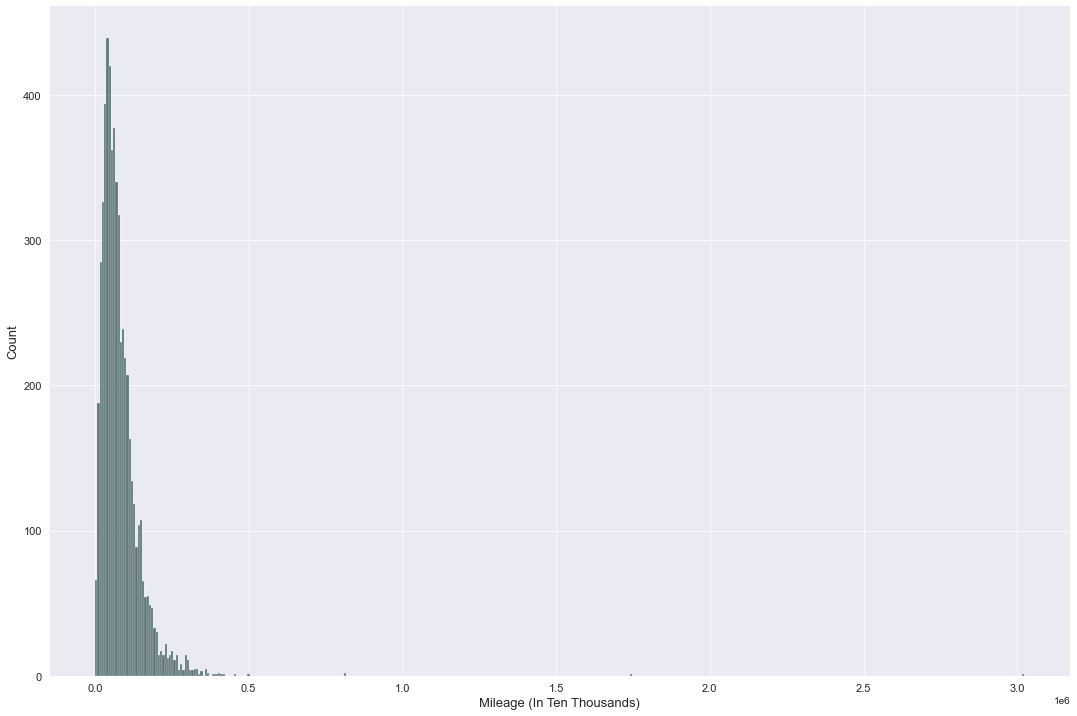

In [19]:
sns.set_style('darkgrid')
plt.figure(figsize = (12,10))
sns.displot(data = df_unique, x = 'Mileage In', aspect= 1.5, height=10, color = 'darkslategray')
plt.xlabel('Mileage (In Ten Thousands)', fontsize = 13)
plt.ylabel('Count', fontsize = 13)
plt.yticks(fontsize = 11)
plt.xticks(fontsize = 11)

In [20]:
df_unique['Log Mileage In'] = np.log(df_unique['Mileage In'])

(array([ 6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16.]),
 [Text(6.0, 0, '6'),
  Text(7.0, 0, '7'),
  Text(8.0, 0, '8'),
  Text(9.0, 0, '9'),
  Text(10.0, 0, '10'),
  Text(11.0, 0, '11'),
  Text(12.0, 0, '12'),
  Text(13.0, 0, '13'),
  Text(14.0, 0, '14'),
  Text(15.0, 0, '15'),
  Text(16.0, 0, '16')])

<Figure size 864x720 with 0 Axes>

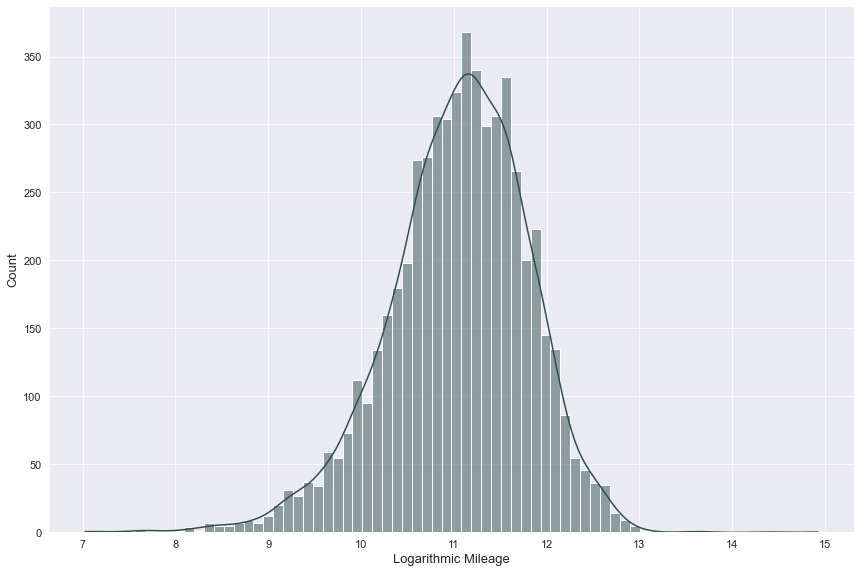

In [21]:
sns.set_style('darkgrid')
plt.figure(figsize = (12,10))
sns.displot(data = df_unique, x = 'Log Mileage In', aspect= 1.5, height= 8, color = 'darkslategray', kde = True)
plt.xlabel('Logarithmic Mileage', fontsize = 13)
plt.ylabel('Count', fontsize = 13)
plt.yticks(fontsize = 11)
plt.xticks(fontsize = 11)

In [22]:
from scipy.stats import skew, kurtosis
def skew_type(skewval, skewthres):
    test_skew_value = abs(skewval)-skewthres    
    if (test_skew_value > 0) & (np.sign(skewval)>0):
        return "right-tailed"
    elif  (test_skew_value > 0) & (np.sign(skewval)<0):
        return "left-tailed"
    else:
        return "approximately symmetric"

In [23]:
from scipy import stats
shapiro_test = stats.shapiro(df_unique['Log Mileage In'])
shapiro_test

C:\Users\Padayao\Anaconda3\envs\Data Science\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9826858043670654, pvalue=8.754435664687084e-26)

In [24]:
# Skewness of Mileage Distribution
df_unique['Mileage In'].skew()

13.957169051506684

In [25]:
# Kurtosis of Mileage Distribution
df_unique['Mileage In'].kurtosis()

476.54140731006254

In [26]:
# Skewness of Mileage Distribution
df_unique['Log Mileage In'].skew()

-0.5409967500545075

In [27]:
# Kurtosis of Mileage Distribution
df_unique['Log Mileage In'].kurtosis()

1.1583292797556246

In [28]:
def mileage_func(x):
    if x <= 10000:
        return '10k'
    if 10001 <= x < 20000:
        return '20k'
    if 20001 <= x < 30000:
        return '30k'
    if 30001 <= x < 40000:
        return '40k'
    if 40001 <= x < 50000:
        return '50k'
    if 50001 <= x < 60000:
        return '60k'
    if 60001 <= x < 70000:
        return '70k'
    if 70001 <= x < 80000:
        return '80k'
    if 80001 <= x < 90000:
        return '90k'
    if 90001 <= x < 100000:
        return '100k'
    if 100001 <= x < 110000:
        return '110k'
    if 110001 <= x < 120000:
        return '120k'
    if 120001 <= x < 130000:
        return '130k'
    if 130001 <= x < 140000:
        return '140k'
    if 140001 <= x < 150000:
        return '150k'
    if 150001 <= x < 160000:
        return '160k'
    if 160001 <= x < 170000:
        return '170k'
    if 170001 <= x < 180000:
        return '180k'
    if 180001 <= x < 190000:
        return '190k'
    if 190001 <= x < 200000:
        return '200k'
    else:
        return 'above 200k'

In [30]:
df_unique['Mileage_Category'] = df_unique['Mileage In'].apply(mileage_func)
df_unique['Mileage_Category'].value_counts().to_frame(name = 'Count')

,Count
50k,591
40k,536
60k,532
70k,499
30k,450
80k,423
90k,339
110k,304
100k,302
20k,296


In [ ]:
df_service = df_eda.groupby(['Mileage_Category','Service Category'])[['Service Category']].count().sort_values(by='Mileage_Category', ascending = False)
df_service.to_csv('Service Category per Mileage.csv')

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize = (12,10))
sns.boxplot(data = df, x = 'Mileage In')

In [ ]:
from scipy import stats

shapiro_test = stats.shapiro(df['Mileage In'])
shapiro_test

### Work Order Analysis

In [ ]:
df_wo = df.groupby(['Work Order','Make'])[['labels']].count()
df_wo.head(25)